# The Movies Dataset 
## Pamella Bezerra (pbsf2@cin.ufpe.br)

## [Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7)


In [0]:
# Most used imports
import numpy as np
import pandas as pd
import re #regex
from numpy import log10, abs

In [770]:
df = pd.read_csv("https://raw.githubusercontent.com/pamella/data-science/master/movies_metadata.csv", encoding="ISO-8859-1")
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [771]:
print('df shape: ', df.shape)

df shape:  (45466, 24)


# Pre-processing data

## Set initial fields type
(mostly category)

In [772]:
# Pandas data types
# https://pbpython.com/pandas_dtypes.html
df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [0]:
# Set columns types
df['adult'] = df['adult'].astype('category')
df['belongs_to_collection'] = df['belongs_to_collection'].astype('category')
df['budget'] = df['budget'].astype('category')
df['genres'] = df['genres'].astype('category')
df['homepage'] = df['homepage'].astype('category')
df['id'] = df['id'].astype('category')
df['imdb_id'] = df['imdb_id'].astype('category')
df['original_language'] = df['original_language'].astype('category')
df['original_title'] = df['original_title'].astype('category')
df['overview'] = df['overview'].astype('category')
df['popularity'] = df['popularity'].astype('category')
df['poster_path'] = df['poster_path'].astype('category')
df['production_companies'] = df['production_companies'].astype('category')
df['production_countries'] = df['production_countries'].astype('category')
df['release_date'] = df['release_date'].astype('category')
df['spoken_languages'] = df['spoken_languages'].astype('category')
df['status'] = df['status'].astype('category')
df['tagline'] = df['tagline'].astype('category')
df['title'] = df['title'].astype('category')
df['video'] = df['video'].astype('category')

In [774]:
df.dtypes

adult                    category
belongs_to_collection    category
budget                   category
genres                   category
homepage                 category
id                       category
imdb_id                  category
original_language        category
original_title           category
overview                 category
popularity               category
poster_path              category
production_companies     category
production_countries     category
release_date             category
revenue                   float64
runtime                   float64
spoken_languages         category
status                   category
tagline                  category
title                    category
video                    category
vote_average              float64
vote_count                float64
dtype: object

### [P.S] Evidence to future insert missing data into runtime column 

In [775]:
print('Runtime mean: ', df['runtime'].mean())
print('Runtime median: ', df['runtime'].median())

Runtime mean:  94.12819945578833
Runtime median:  95.0


## Manage columns which values are a list of dictionaries
**(using regex)**

In [776]:
df[['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']].head()

,belongs_to_collection,genres,production_companies,production_countries,spoken_languages
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"


In [777]:
# examples of regex to get the chosen pattern
print ('BELONGS TO COLLECTION')
belongs_to_collection = df['belongs_to_collection'][0]
print('Row: ', belongs_to_collection)
pattern = re.search(r"'name':\ '([^']*)'", belongs_to_collection).group(1)
print('Pattern: ', pattern, '\n')


print ('GENRE')
genres = df['genres'][0]
print('Row: ', genres)
pattern = re.search(r"'name':\ '([^']*)'", genres).group(1)
print('Pattern: ', pattern, '\n')


print ('PRODUCTION COMPANIE')
production_companies = df['production_companies'][0]
print('Row: ', production_companies)
pattern = re.search(r"'name':\ '([^']*)'", production_companies).group(1)
print('Pattern: ', pattern, '\n')


print ('PRODUCTION COUNTRY')
production_countries = df['production_countries'][0]
print('Row: ', production_countries)
pattern = re.search(r"'name':\ '([^']*)'", production_countries).group(1)
print('Pattern: ', pattern, '\n')


print ('SPOKEN LANGUAGE')
spoken_languages = df['spoken_languages'][0]
print('Row: ', spoken_languages)
pattern = re.search(r"'name':\ '([^']*)'", spoken_languages).group(1)
print('Pattern: ', pattern, '\n')

BELONGS TO COLLECTION
Row:  {'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}
Pattern:  Toy Story Collection 

GENRE
Row:  [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
Pattern:  Animation 

PRODUCTION COMPANIE
Row:  [{'name': 'Pixar Animation Studios', 'id': 3}]
Pattern:  Pixar Animation Studios 

PRODUCTION COUNTRY
Row:  [{'iso_3166_1': 'US', 'name': 'United States of America'}]
Pattern:  United States of America 

SPOKEN LANGUAGE
Row:  [{'iso_639_1': 'en', 'name': 'English'}]
Pattern:  English 



In [0]:
# Replace a list of dictionary with one category string
df['belongs_to_collection'] = df['belongs_to_collection'].str.extract(r"'name':\ '([^']*)'", expand=False)
df['genres'] = df['genres'].str.extract(r":\ '([^']*)'", expand=False)
df['production_companies'] = df['production_companies'].str.extract(r"'name':\ '([^']*)'", expand=False)
df['production_countries'] = df['production_countries'].str.extract(r"'name':\ '([^']*)'", expand=False)
df['spoken_languages'] = df['spoken_languages'].str.extract(r"'name':\ '([^']*)'", expand=False)


In [779]:
df[['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']].head()

,belongs_to_collection,genres,production_companies,production_countries,spoken_languages
0,Toy Story Collection,Animation,Pixar Animation Studios,United States of America,English
1,NaN,Adventure,TriStar Pictures,United States of America,English
2,Grumpy Old Men Collection,Romance,Warner Bros.,United States of America,English
3,NaN,Comedy,Twentieth Century Fox Film Corporation,United States of America,English
4,Father of the Bride Collection,Comedy,Sandollar Productions,United States of America,English


## Manage bool column

In [780]:
df.dtypes

adult                    category
belongs_to_collection      object
budget                   category
genres                     object
homepage                 category
id                       category
imdb_id                  category
original_language        category
original_title           category
overview                 category
popularity               category
poster_path              category
production_companies       object
production_countries       object
release_date             category
revenue                   float64
runtime                   float64
spoken_languages           object
status                   category
tagline                  category
title                    category
video                    category
vote_average              float64
vote_count                float64
dtype: object

In [781]:
print('adult values: ', list(df['adult'].unique()))

adult values:  ['False', 'True', ' - Written by Ã\x98rnÃ¥s', ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.', ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']


In [0]:
# Replace string to bool
df['adult'].replace('True', True, inplace=True)
df['adult'].replace('False', False, inplace=True)
df['adult'].replace(' - Written by Ã\x98rnÃ¥s', False, inplace=True)
df['adult'].replace(' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.', False, inplace=True)
df['adult'].replace(' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.', False, inplace=True)

In [783]:
print('adult values: ', list(df['adult'].unique()))

adult values:  [False, True]


## Remove almost empty columns and almost empty rows

In [784]:
df.shape

(45466, 24)

In [785]:
print(df.isnull().sum())

adult                        0
belongs_to_collection    41082
budget                       0
genres                    2442
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies     11939
production_countries      6289
release_date                87
revenue                      6
runtime                    263
spoken_languages          3835
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [0]:
# Remove columns with less than 70% missing data
df = df.dropna(thresh=0.7*len(df), axis=1)

# Remove instances with less than 70% missing data
df = df.dropna(thresh=0.7*len(df.columns), axis=0)

In [787]:
print('shape', df.shape)
print('\n')
print(df.isnull().sum())

shape (45442, 21)


adult                       0
budget                      0
genres                   2425
id                          0
imdb_id                    16
original_language          11
original_title              0
overview                  937
popularity                  0
poster_path               371
production_companies    11915
production_countries     6265
release_date               74
revenue                     0
runtime                   241
spoken_languages         3811
status                     77
title                       0
video                       0
vote_average                0
vote_count                  0
dtype: int64


## Remove unused columns during analysis

In [788]:
print('columns: ', list(df.columns))
print('len: ', len(df.columns))

columns:  ['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'video', 'vote_average', 'vote_count']
len:  21


In [789]:
# overview: text for movie synopsis
# poster_path: relative path for movie poster image
# video: boolean

df[['overview', 'poster_path', 'video']].head()

,overview,poster_path,video
0,"Led by Woody, Andy's toys live happily in his ...",/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,False
1,When siblings Judy and Peter discover an encha...,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,False
2,A family wedding reignites the ancient feud be...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,False
3,"Cheated on, mistreated and stepped on, the wom...",/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,False
4,Just when George Banks has recovered from his ...,/e64sOI48hQXyru7naBFyssKFxVd.jpg,False


In [790]:
df = df.drop(['overview', 'poster_path', 'video'], axis=1)
print('columns: ', list(df.columns))
print('len: ', len(df.columns))

columns:  ['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'vote_average', 'vote_count']
len:  18


## Inserting missing data into 'runtime' (float) column

In [791]:
print(df.isnull().sum())

adult                       0
budget                      0
genres                   2425
id                          0
imdb_id                    16
original_language          11
original_title              0
popularity                  0
production_companies    11915
production_countries     6265
release_date               74
revenue                     0
runtime                   241
spoken_languages         3811
status                     77
title                       0
vote_average                0
vote_count                  0
dtype: int64


In [792]:
print('Runtime mean: ', df['runtime'].mean())
print('Runtime median: ', df['runtime'].median())

Runtime mean:  94.13236432822282
Runtime median:  95.0


In [0]:
# Insert median in the runtime's missing data
df['runtime'].fillna(df['runtime'].median(), inplace=True)

In [794]:
# print(df.isnull().sum())
print('null runtime instances: ', df['runtime'].isnull().sum())

null runtime instances:  0


In [795]:
print('runtime zero: ', len(df[df['runtime'] == 0]))

# Insert median when runtime instance is zero
df.loc[df['runtime'] == 0, 'runtime'] = df['runtime'].median()

print('new runtime zero: ', len(df[df['runtime'] == 0]))

runtime zero:  1556
new runtime zero:  0


In [796]:
# Here we can see another 'strange' pattern such min value, but this is going to be treated later
df['runtime'].describe()

count    45442.000000
mean        97.389904
std         33.956036
min          1.000000
25%         87.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

## Remove instances with missing data --> df2

In [797]:
# current df info
print('len: ', len(df))
print('\n')
print(df.isnull().sum())

len:  45442


adult                       0
budget                      0
genres                   2425
id                          0
imdb_id                    16
original_language          11
original_title              0
popularity                  0
production_companies    11915
production_countries     6265
release_date               74
revenue                     0
runtime                     0
spoken_languages         3811
status                     77
title                       0
vote_average                0
vote_count                  0
dtype: int64


In [0]:
# Create a devirate dataframe without instances with missing data --> df2
df2 = df.copy()
df2 = df2.dropna()

In [799]:
# New dataframe, df2, info
print('len: ', len(df2))
print('\n')
print(df2.isnull().sum())

len:  32015


adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64


## Update fields type


In [800]:
df2.dtypes

adult                       bool
budget                  category
genres                    object
id                      category
imdb_id                 category
original_language       category
original_title          category
popularity              category
production_companies      object
production_countries      object
release_date            category
revenue                  float64
runtime                  float64
spoken_languages          object
status                  category
title                   category
vote_average             float64
vote_count               float64
dtype: object

In [0]:
# Update columns types
df2['genres'] = df2['genres'].astype('category')
df2['production_companies'] = df2['production_companies'].astype('category')
df2['production_countries'] = df2['production_countries'].astype('category')
df2['spoken_languages'] = df2['spoken_languages'].astype('category')
df2['budget'] = df2['budget'].astype('float64')
df2['id'] = df2['id'].astype('int64')
df2['popularity'] = df2['popularity'].astype('float64')
df2['release_date'] = df2['release_date'].astype('datetime64')

In [802]:
# After updating
df2.dtypes

adult                             bool
budget                         float64
genres                        category
id                               int64
imdb_id                       category
original_language             category
original_title                category
popularity                     float64
production_companies          category
production_countries          category
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages              category
status                        category
title                         category
vote_average                   float64
vote_count                     float64
dtype: object

## Remove duplicated instances

In [803]:
# Show duplicated instances
df2[df2.duplicated()].sort_values('original_title')

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
13375,False,0.0,Thriller,141971,tt1180333,fi,Blackout,0.411949,Filmiteollisuus Fine,Finland,2008-12-26,0.0,108.0,suomi,Released,Blackout,6.7,3.0
16764,False,0.0,Thriller,141971,tt1180333,fi,Blackout,0.411949,Filmiteollisuus Fine,Finland,2008-12-26,0.0,108.0,suomi,Released,Blackout,6.7,3.0
1465,False,0.0,Drama,105045,tt0111613,de,Das Versprechen,0.122178,Studio Babelsberg,Germany,1995-02-16,0.0,115.0,Deutsch,Released,The Promise,5.0,1.0
24844,False,0.0,Comedy,11115,tt0446676,en,Deal,6.880365,Andertainment Group,United States of America,2008-01-29,0.0,85.0,English,Released,Deal,5.2,22.0
29374,False,0.0,Drama,42495,tt0067306,en,King Lear,0.187901,Royal Shakespeare Company,Denmark,1971-02-04,0.0,137.0,English,Rumored,King Lear,8.0,3.0
9165,False,0.0,Crime,5511,tt0062229,fr,Le SamouraÃ¯,9.091288,Fida cinematografica,France,1967-10-25,39481.0,105.0,FranÃ§ais,Released,Le SamouraÃ¯,7.9,187.0
40276,False,0.0,Comedy,97995,tt0127834,en,Seven Years Bad Luck,0.141558,Max Linder Productions,United States of America,1921-02-06,0.0,62.0,English,Released,Seven Years Bad Luck,5.6,4.0
21854,False,0.0,Drama,152795,tt1821641,en,The Congress,8.534039,Pandora Filmproduktion,Belgium,2013-05-16,455815.0,122.0,English,Released,The Congress,6.4,165.0
9327,False,0.0,Adventure,23305,tt0295682,en,The Warrior,1.967992,Filmfour,France,2001-09-23,0.0,86.0,à¤¹à¤¿à¤¨à¥à¤¦à¥,Released,The Warrior,6.3,15.0
45265,False,0.0,Comedy,265189,tt2121382,sv,Turist,12.165685,Motlys,Norway,2014-08-15,1359497.0,118.0,FranÃ§ais,Released,Force Majeure,6.8,255.0


In [804]:
print('duplicated instances: ', len(df2[df2.duplicated()].sort_values('original_title')))

duplicated instances:  11


In [805]:
# Remove duplicated instances
df2.drop_duplicates(keep = False, inplace = True)
print('df2 new len: ', len(df2))

df2 new len:  31994


## KNN to insert missing data --> df_knn

In this section, I am going to use **df**, the first dataframe which has instances with missing data.


I've tried to run KNN, but the processor crashed due to dataframe size. So, I removed instances when **budget** and **revenue** was zero, considering it as float missing data. I did that to shorter the dataframe to be able to test the KNN insert method.

P.S.: Later in this notebook, I will discuss more why considering zero as float missing data.

In [806]:
df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,False,30000000,Animation,862,tt0114709,en,Toy Story,21.9469,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,Toy Story,7.7,5415.0
1,False,65000000,Adventure,8844,tt0113497,en,Jumanji,17.0155,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,English,Released,Jumanji,6.9,2413.0
2,False,0,Romance,15602,tt0113228,en,Grumpier Old Men,11.7129,Warner Bros.,United States of America,1995-12-22,0.0,101.0,English,Released,Grumpier Old Men,6.5,92.0
3,False,16000000,Comedy,31357,tt0114885,en,Waiting to Exhale,3.85949,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,English,Released,Waiting to Exhale,6.1,34.0
4,False,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,8.38752,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,English,Released,Father of the Bride Part II,5.7,173.0


In [807]:
df_knn = df.copy()
print(df_knn.isnull().sum())

adult                       0
budget                      0
genres                   2425
id                          0
imdb_id                    16
original_language          11
original_title              0
popularity                  0
production_companies    11915
production_countries     6265
release_date               74
revenue                     0
runtime                     0
spoken_languages         3811
status                     77
title                       0
vote_average                0
vote_count                  0
dtype: int64


In [808]:
df_knn.dtypes

adult                       bool
budget                  category
genres                    object
id                      category
imdb_id                 category
original_language       category
original_title          category
popularity              category
production_companies      object
production_countries      object
release_date            category
revenue                  float64
runtime                  float64
spoken_languages          object
status                  category
title                   category
vote_average             float64
vote_count               float64
dtype: object

For some reason, **NaN** cells weren't being recognized as **numpy NaN** and due to that its values had been replaced by **-1 as cat codes**. So, I've manually fixed it to be able to run KNN.

In [809]:
print('NaN genres instances: ', len(df_knn[df_knn['genres'] == np.NaN]))
df_knn[45440:45442]

NaN genres instances:  0


,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
45464,False,0,NaN,227506,tt0008536,en,Satana likuyushchiy,0.003503,Yermoliev,Russia,1917-10-21,0.0,87.0,NaN,Released,Satan Triumphant,0.0,0.0
45465,False,0,NaN,461257,tt6980792,en,Queerama,0.163015,NaN,United Kingdom,2017-06-09,0.0,75.0,English,Released,Queerama,0.0,0.0


In [0]:
# Update columns types
df_knn['genres'] = df_knn['genres'].astype('category')
df_knn['production_companies'] = df_knn['production_companies'].astype('category')
df_knn['production_countries'] = df_knn['production_countries'].astype('category')
df_knn['spoken_languages'] = df_knn['spoken_languages'].astype('category')
df_knn['budget'] = df_knn['budget'].astype('float64')
df_knn['id'] = df_knn['id'].astype('int64')
df_knn['popularity'] = df_knn['popularity'].astype('float64')
# float() argument must be a string or a number, not 'Timestamp'
df_knn['release_date'] = df_knn['release_date'].astype('category')


# get cat codes
df_knn['genres'] = df_knn['genres'].cat.codes
df_knn['imdb_id'] = df_knn['imdb_id'].cat.codes
df_knn['original_language'] = df_knn['original_language'].cat.codes
df_knn['original_title'] = df_knn['original_title'].cat.codes
df_knn['production_companies'] = df_knn['production_companies'].cat.codes
df_knn['production_countries'] = df_knn['production_countries'].cat.codes
df_knn['spoken_languages'] = df_knn['spoken_languages'].cat.codes
df_knn['status'] = df_knn['status'].cat.codes
df_knn['title'] = df_knn['title'].cat.codes
df_knn['release_date'] = df_knn['release_date'].cat.codes


In [811]:
df_knn[45440:45442]

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
45464,False,0.0,-1,227506,170,20,27129,0.003503,10321,106,243,0.0,87.0,-1,4,26679,0.0,0.0
45465,False,0.0,-1,461257,45408,20,25602,0.163015,-1,133,17274,0.0,75.0,15,4,25071,0.0,0.0


In [812]:
print(df_knn.isnull().sum())

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64


In [0]:
df_knn['genres'].replace(-1, np.nan, inplace=True)
df_knn['original_language'].replace(-1, np.nan, inplace=True)
df_knn['production_companies'].replace(-1, np.nan, inplace=True)
df_knn['production_countries'].replace(-1, np.nan, inplace=True)
df_knn['release_date'].replace(-1, np.nan, inplace=True)
df_knn['spoken_languages'].replace(-1, np.nan, inplace=True)


In [814]:
df_knn.tail()

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
45461,False,0.0,6.0,439050,45274,25.0,41020,0.072051,NaN,57.0,NaN,0.0,90.0,60.0,4,29278,4.0,1.0
45462,False,0.0,6.0,111109,37205,82.0,28085,0.178241,8519.0,100.0,15390.0,0.0,360.0,0.0,4,6516,9.0,3.0
45463,False,0.0,0.0,67758,23291,20.0,3995,0.903007,500.0,135.0,12720.0,0.0,90.0,15.0,4,4377,3.8,6.0
45464,False,0.0,NaN,227506,170,20.0,27129,0.003503,10321.0,106.0,243.0,0.0,87.0,NaN,4,26679,0.0,0.0
45465,False,0.0,NaN,461257,45408,20.0,25602,0.163015,NaN,133.0,17274.0,0.0,75.0,15.0,4,25071,0.0,0.0


In [815]:
print(df_knn.isnull().sum())

adult                       0
budget                      0
genres                   2425
id                          0
imdb_id                     0
original_language          11
original_title              0
popularity                  0
production_companies    11915
production_countries     6265
release_date               74
revenue                     0
runtime                     0
spoken_languages         3811
status                      0
title                       0
vote_average                0
vote_count                  0
dtype: int64


In [816]:
print('df_knn len: ', len(df_knn))

# Remove float zero data (missing float data)
df_knn = df_knn.loc[(df_knn['budget'] > 0) | (df_knn['revenue'] > 0)]
print('df_knn len without float zero data: ', len(df_knn))

df_knn len:  45442
df_knn len without float zero data:  10917


In [817]:
from fancyimpute import KNN
df_knn = KNN(k=5).fit_transform(df_knn)

Imputing row 1/10917 with 0 missing, elapsed time: 24.195
Imputing row 101/10917 with 0 missing, elapsed time: 24.197
Imputing row 201/10917 with 0 missing, elapsed time: 24.197
Imputing row 301/10917 with 0 missing, elapsed time: 24.198
Imputing row 401/10917 with 0 missing, elapsed time: 24.199
Imputing row 501/10917 with 0 missing, elapsed time: 24.200
Imputing row 601/10917 with 0 missing, elapsed time: 24.200
Imputing row 701/10917 with 0 missing, elapsed time: 24.201
Imputing row 801/10917 with 0 missing, elapsed time: 24.202
Imputing row 901/10917 with 0 missing, elapsed time: 24.203
Imputing row 1001/10917 with 0 missing, elapsed time: 24.204
Imputing row 1101/10917 with 0 missing, elapsed time: 24.205
Imputing row 1201/10917 with 0 missing, elapsed time: 24.205
Imputing row 1301/10917 with 0 missing, elapsed time: 24.206
Imputing row 1401/10917 with 0 missing, elapsed time: 24.207
Imputing row 1501/10917 with 0 missing, elapsed time: 24.208
Imputing row 1601/10917 with 0 missi

In [818]:
df_knn.shape

(10917, 18)

# Remove outliers --> df3

In [819]:
# Describe
df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.199400e+04,31994.000000,31994.000000,3.199400e+04,31994.000000,31994.000000,31994.000000
mean,5.917794e+06,98203.537007,3.780665,1.585737e+07,99.243108,5.842167,152.546665
std,2.050224e+07,111149.237387,6.916594,7.618912e+07,29.576562,1.594721,580.177457
min,0.000000e+00,2.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000e+00,19690.500000,0.658284,0.000000e+00,88.000000,5.300000,5.000000
50%,0.000000e+00,47852.500000,1.764260,0.000000e+00,96.000000,6.100000,16.000000
75%,1.200000e+01,132289.250000,5.512900,0.000000e+00,109.000000,6.800000,59.750000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,931.000000,10.000000,14075.000000


## The budget topic
Due to analyzing of **budget** describe, I was able to realize some data discrepancy. With a little research I found out an explanation, which is the dataset contains data from different levels of production and the cost/budgets involved (low, medium, studio/high budget).

So, I'd made subsets to each of three levels in order to manipulate and find outliers, but I probably made its subsets biased because I couldn't find out outliers. Even so, I've left some analysis below about this budget point, but I've decided to manipulate other columns to show outliers detection modes. 




> Font: [Future Learn](https://www.futurelearn.com/courses/film-production/0/steps/12303)



In [820]:
df2['budget'].describe()

count    3.199400e+04
mean     5.917794e+06
std      2.050224e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.200000e+01
max      3.800000e+08
Name: budget, dtype: float64

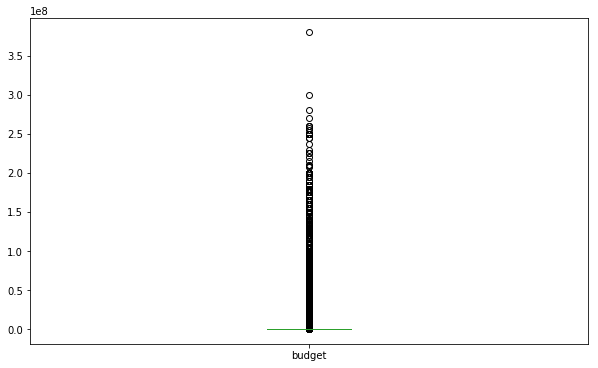

In [821]:
df2['budget'].plot.box()

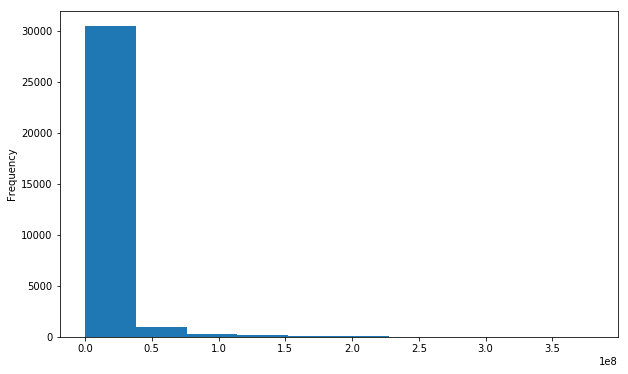

In [822]:
df2['budget'].plot.hist()

In [823]:
total_budget = len(df2)
print('Total budget instances: ', total_budget)

zero_budget = len(df2[df2['budget'] == 0])
print('Instances with zero budget: ', zero_budget)

positive_budget = len(df2[df2['budget'] > 0])
print('Instances with positive budget: ', positive_budget)


negative_budget = len(df2[df2['budget'] < 0])
print('Instances with negative budget: ', negative_budget)

Total budget instances:  31994
Instances with zero budget:  23940
Instances with positive budget:  8054
Instances with negative budget:  0


In [824]:
df2[df2['budget'] > 0].sort_values('budget').head()

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
3342,False,1.0,Drama,3082,tt0027977,en,Modern Times,8.159556,United Artists,United States of America,1936-02-05,8500000.0,87.0,English,Released,Modern Times,8.1,881.0
13025,False,1.0,Comedy,12689,tt0963743,en,"Angus, Thongs and Perfect Snogging",8.896155,Paramount Pictures,United Kingdom,2008-07-25,0.0,100.0,English,Released,"Angus, Thongs and Perfect Snogging",6.4,231.0
25093,False,1.0,Drama,78646,tt1827358,sv,Apflickorna,1.006534,Atmo Media Network,Sweden,2011-01-31,0.0,84.0,svenska,Released,She Monkeys,4.7,12.0
4000,False,1.0,Drama,13703,tt0093407,en,Less Than Zero,4.028679,Twentieth Century Fox Film Corporation,United States of America,1987-11-06,12396383.0,98.0,English,Released,Less Than Zero,6.1,77.0
41784,False,1.0,Animation,51281,tt1701992,ru,ÐÐ°Ð´ÐºÐ¸Ð¹ ÑÑÑÐ½Ð¾Ðº,0.104250,Stayer Studio,Russia,2010-09-16,0.0,75.0,PÑÑÑÐºÐ¸Ð¹,Released,The Ugly Duckling,6.5,2.0


In [825]:
df2[df2['budget'] > 0].sort_values('budget').tail()

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
16130,False,260000000.0,Animation,38757,tt0398286,en,Tangled,14.684761,Walt Disney Pictures,United States of America,2010-11-24,5.917949e+08,100.0,English,Released,Tangled,7.4,3419.0
11067,False,270000000.0,Adventure,1452,tt0348150,en,Superman Returns,13.284712,DC Comics,United States of America,2006-06-28,3.910812e+08,154.0,English,Released,Superman Returns,5.4,1429.0
26558,False,280000000.0,Action,99861,tt2395427,en,Avengers: Age of Ultron,37.379420,Marvel Studios,United States of America,2015-04-22,1.405404e+09,141.0,English,Released,Avengers: Age of Ultron,7.3,6908.0
11827,False,300000000.0,Adventure,285,tt0449088,en,Pirates of the Caribbean: At World's End,31.363664,Walt Disney Pictures,United States of America,2007-05-19,9.610000e+08,169.0,English,Released,Pirates of the Caribbean: At World's End,6.9,4627.0
17124,False,380000000.0,Adventure,1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,27.887720,Walt Disney Pictures,United States of America,2011-05-14,1.045714e+09,136.0,English,Released,Pirates of the Caribbean: On Stranger Tides,6.4,5068.0


In [826]:
low = df2[(df2['budget'] >= 1000000) & (df2['budget'] < 5000000)]
print('len low: ', len(low))

medium = df2[(df2['budget'] >= 5000000) & (df2['budget'] < 30000000)]
print('len medium: ', len(medium))

high = df2[df2['budget'] >= 30000000]
print('len high: ', len(high))

len low:  1677
len medium:  3275
len high:  2014


### Low - Robust z-score

In [827]:
low['budget'].describe()

count    1.677000e+03
mean     2.540424e+06
std      1.089416e+06
min      1.000000e+06
25%      1.500000e+06
50%      2.500000e+06
75%      3.500000e+06
max      4.940939e+06
Name: budget, dtype: float64

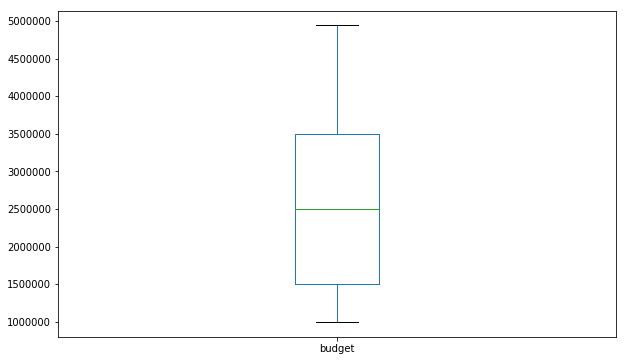

In [828]:
low['budget'].plot.box()

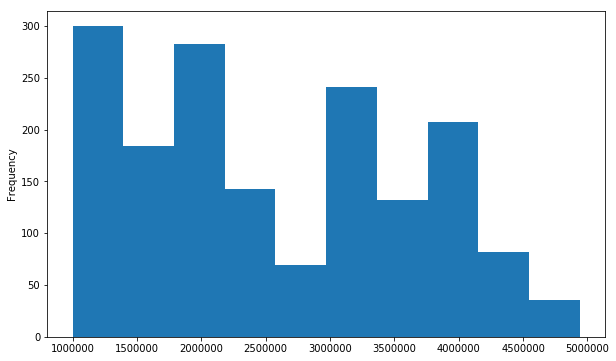

In [829]:
low['budget'].plot.hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


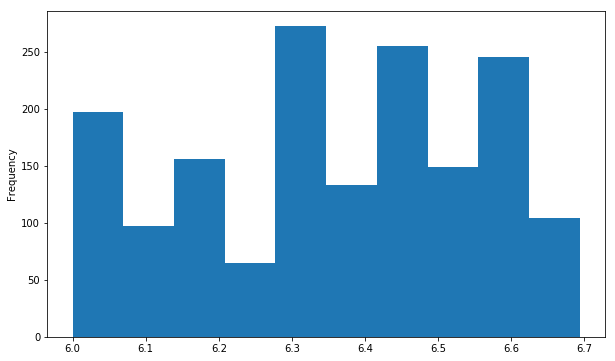

In [830]:
low['budget_log'] = log10(low['budget'])
low['budget_log'].plot.hist()

In [831]:
# Median Absolute Deviation
mad = abs(low['budget_log'] - low['budget_log'].median()).median()*(1/0.6745)
print('mad: ', mad)

mad:  0.21893348650293376


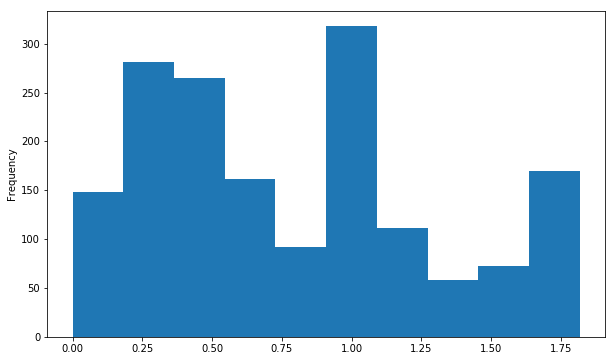

In [832]:
(abs(low['budget_log']-low['budget_log'].median())/mad).plot.hist()

In [833]:
print('outlier (mad < 3.5): ', len(low[abs(low['budget_log']-low['budget_log'].median())/mad > 3.5]))
print('mad > 3.5: ', len(low[abs(low['budget_log']-low['budget_log'].median())/mad < 3.5]))

outlier (mad < 3.5):  0
mad > 3.5:  1677


### Medium - Tukey Method

In [834]:
medium['budget'].describe()

count    3.275000e+03
mean     1.370956e+07
std      6.754304e+06
min      5.000000e+06
25%      8.000000e+06
50%      1.200000e+07
75%      1.950000e+07
max      2.950000e+07
Name: budget, dtype: float64

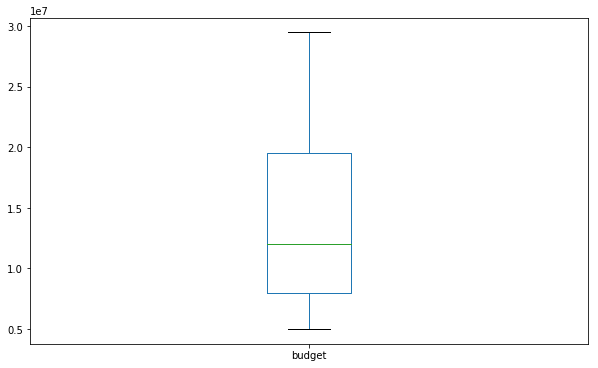

In [835]:
medium['budget'].plot.box()

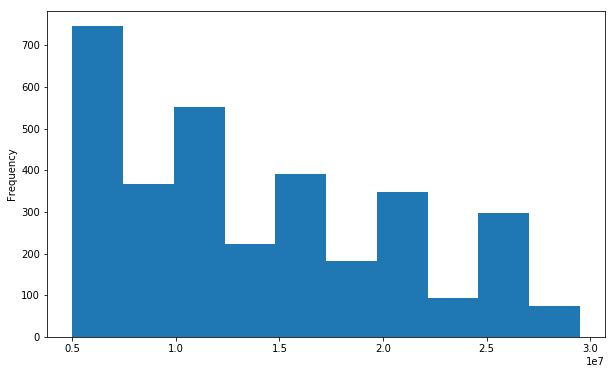

In [836]:
medium['budget'].plot.hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


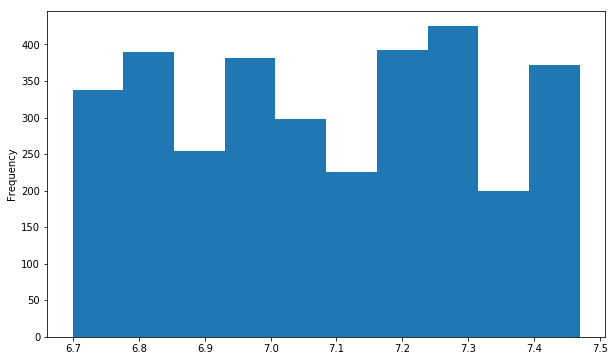

In [837]:
medium['budget_log'] = log10(medium['budget'])
medium['budget_log'].plot.hist()

In [838]:
q1 = medium['budget_log'].quantile(q=0.25)
q3 = medium['budget_log'].quantile(q=0.75)
iqr = q3 - q1
print('Interquartile range: ', iqr)

Interquartile range:  0.38694462437057453


In [839]:
medium[medium['budget_log'] < (q1-1.5*iqr)]

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,budget_log


In [840]:
medium[medium['budget_log'] > (q3+1.5*iqr)]

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,budget_log


In [841]:
print('Outliers: ', len(medium[(medium['budget_log'] < (q1-1.5*iqr)) & (medium['budget_log'] > (q3+1.5*iqr))]))

Outliers:  0


### High - Robust z-score

In [842]:
high['budget'].describe()

count    2.014000e+03
mean     6.943006e+07
std      4.503108e+07
min      3.000000e+07
25%      3.800000e+07
50%      5.500000e+07
75%      8.083525e+07
max      3.800000e+08
Name: budget, dtype: float64

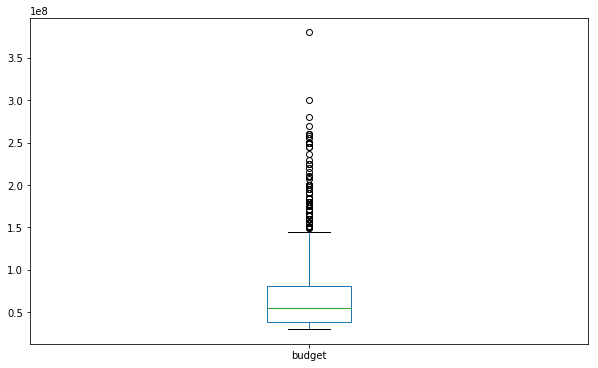

In [843]:
high['budget'].plot.box()

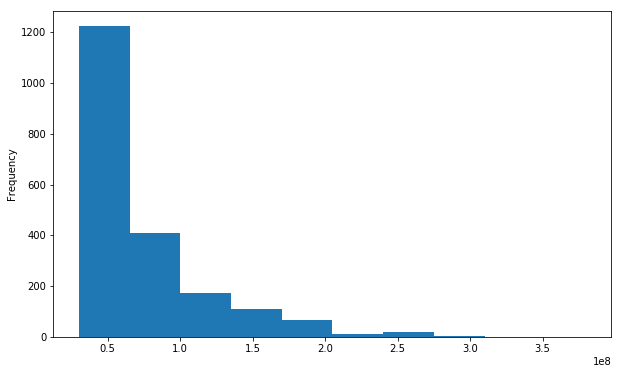

In [844]:
high['budget'].plot.hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


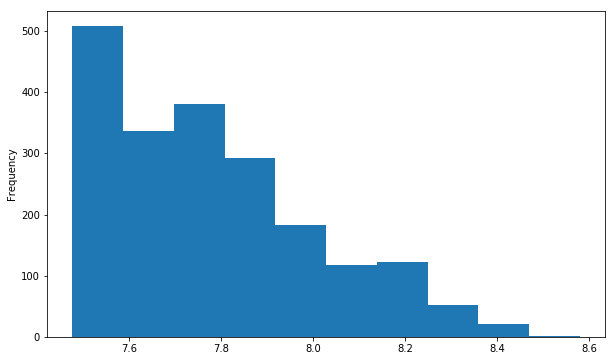

In [845]:
high['budget_log'] = log10(high['budget'])
high['budget_log'].plot.hist()

In [0]:
# https://trainingdatascience.com/workshops/histograms-and-skewed-data/
# aux = high['budget'].apply(np.sqrt)
# aux.plot.hist()

In [847]:
# Median Absolute Deviation
mad = abs(high['budget_log'] - high['budget_log'].median()).median()*(1/0.6745)
print('mad: ', mad)

mad:  0.24125618606034047


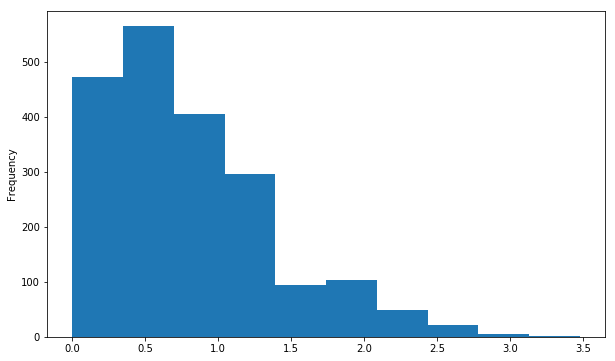

In [848]:
(abs(high['budget_log']-high['budget_log'].median())/mad).plot.hist()

In [849]:
print('outlier (mad < 3.5): ', len(high[abs(high['budget_log']-high['budget_log'].median())/mad > 3.5]))
print('mad > 3.5: ', len(high[abs(high['budget_log']-high['budget_log'].median())/mad < 3.5]))

outlier (mad < 3.5):  0
mad > 3.5:  2014


## Univariate
(symmetrical distribution)

### Robust z-score - Runtime

In [850]:
df2['runtime'].describe()

count    31994.000000
mean        99.243108
std         29.576562
min          1.000000
25%         88.000000
50%         96.000000
75%        109.000000
max        931.000000
Name: runtime, dtype: float64

Here I could notice that some outliers had higher **runtime** values. After researching its titles, I found out a lot of them was actually a TV series and not a movie.

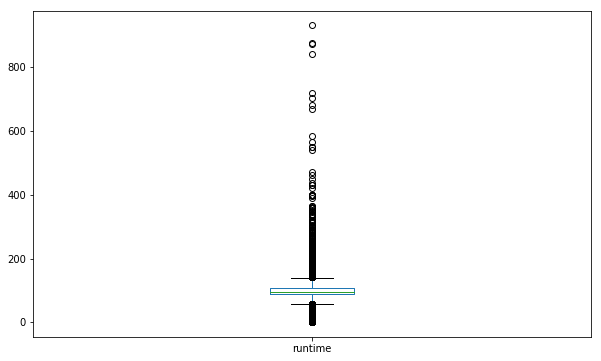

In [851]:
df2['runtime'].plot.box()

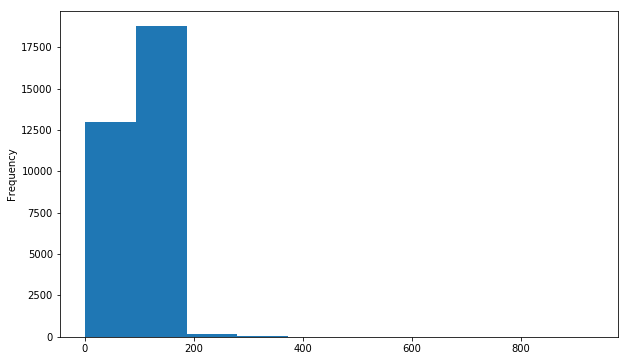

In [852]:
df2['runtime'].plot.hist()

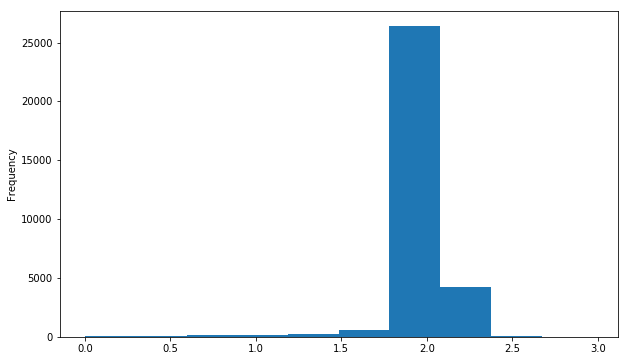

In [853]:
df2['runtime_log'] = log10(df2['runtime'])
df2['runtime_log'].plot.hist()

In [854]:
# Median Absolute Deviation
mad = abs(df2['runtime_log'] - df2['runtime_log'].median()).median()*(1/0.6745)
print('mad: ', mad)

mad:  0.06380227164596292


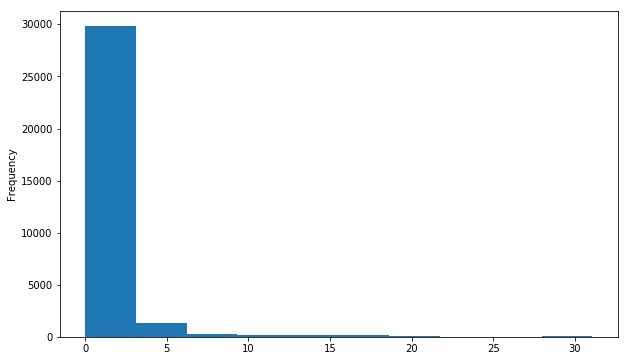

In [855]:
(abs(df2['runtime_log'] - df2['runtime_log'].median())/mad).plot.hist()

In [856]:
# Show outliers
df2[abs(df2['runtime_log'] - df2['runtime_log'].median())/mad > 3.5]

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,runtime_log
5,False,60000000.0,Action,949,tt0113277,en,Heat,17.924927,Regency Enterprises,United States of America,1995-12-15,187436818.0,170.0,English,Released,Heat,7.7,1886.0,2.230449
13,False,44000000.0,History,10858,tt0113987,en,Nixon,5.092000,Hollywood Pictures,United States of America,1995-12-22,13681765.0,192.0,English,Released,Nixon,7.1,72.0,2.283301
15,False,52000000.0,Drama,524,tt0112641,en,Casino,10.137389,Universal Pictures,France,1995-11-22,116112375.0,178.0,English,Released,Casino,7.8,1343.0,2.250420
32,False,0.0,Romance,78802,tt0114952,fr,"Guillaumet, les ailes du courage",0.745542,Iwerks Entertainment,France,1996-09-18,0.0,50.0,English,Released,Wings of Courage,6.8,4.0,1.698970
36,False,0.0,Adventure,139405,tt0112286,en,Across the Sea of Time,0.114469,Sony New Technologies,United States of America,1995-10-20,0.0,51.0,PÑÑÑÐºÐ¸Ð¹,Released,Across the Sea of Time,3.5,2.0,1.707570
72,False,0.0,Drama,48750,tt0113828,fr,Les misÃ©rables,1.479446,Les Films 13,France,1995-03-22,0.0,175.0,FranÃ§ais,Released,Les Miserables,6.6,8.0,2.243038
108,False,72000000.0,Action,197,tt0112573,en,Braveheart,20.755149,Icon Entertainment International,United States of America,1995-05-24,210000000.0,177.0,English,Released,Braveheart,7.7,3404.0,2.247973
242,False,700000.0,Documentary,14275,tt0110057,en,Hoop Dreams,9.476660,Fine Line Features,United States of America,1994-09-12,7830611.0,171.0,English,Released,Hoop Dreams,7.7,91.0,2.232996
298,False,0.0,Drama,10452,tt0110963,fr,La Reine Margot,4.405405,Renn Productions,France,1994-05-13,0.0,162.0,FranÃ§ais,Released,Queen Margot,7.0,67.0,2.209515
358,False,0.0,Documentary,41647,tt0107472,en,Die Macht der Bilder: Leni Riefenstahl,0.568884,Channel Four Films,France,1993-09-11,449707.0,180.0,Deutsch,Released,"The Wonderful, Horrible Life of Leni Riefenstahl",7.3,5.0,2.255273


In [857]:
print('Total (df3 len): ', len(df2))
print('Outlier (mad < 3.5): ', len(df2[abs(df2['runtime_log'] - df2['runtime_log'].median())/mad > 3.5]))

Total (df3 len):  31994
Outlier (mad < 3.5):  1732


In [858]:
df3 = df2[abs(df2['runtime_log'] - df2['runtime_log'].median())/mad < 3.5]
print('df3 len: ', len(df3))

df3 len:  30262


### Tukey Method - Revenue

In [859]:
df3['revenue'].describe()

count    3.026200e+04
mean     1.588135e+07
std      7.330404e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.068224e+09
Name: revenue, dtype: float64

Just like I saw at budget column before, the **revenue** (float) column also has a lot of zero as data, which I am considering a way of numeric missing data. So, I am going to use a positive subset to show the use of **Tukey method** for outlier detection.

In [860]:
total_revenue = len(df3)
print('Total revenue instances: ', total_revenue)

zero_revenue = len(df3[df3['revenue'] == 0])
print('Instances with zero revenue: ', zero_revenue)

positive_revenue = len(df3[df3['revenue'] > 0])
print('Instances with positive revenue: ', positive_revenue)


negative_revenue = len(df3[df3['revenue'] < 0])
print('Instances with negative revenue: ', negative_revenue)

Total revenue instances:  30262
Instances with zero revenue:  23506
Instances with positive revenue:  6756
Instances with negative revenue:  0


In [861]:
# Positive subset
positive_revenue = df3[df3['revenue'] > 0]
positive_revenue['revenue'].describe()

count    6.756000e+03
mean     7.113695e+07
std      1.419182e+08
min      1.000000e+00
25%      3.224142e+06
50%      1.914911e+07
75%      7.227168e+07
max      2.068224e+09
Name: revenue, dtype: float64

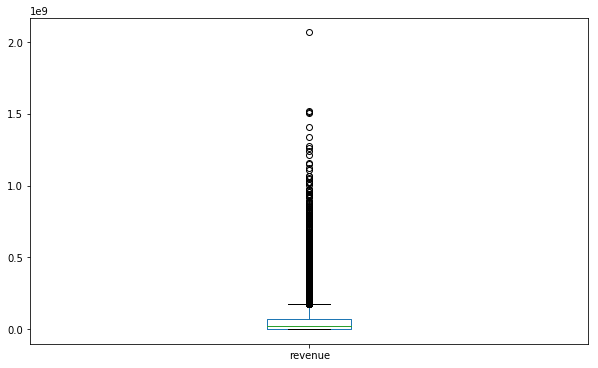

In [862]:
positive_revenue['revenue'].plot.box()

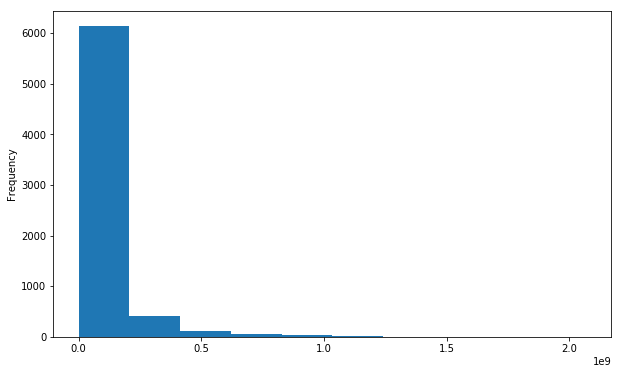

In [863]:
positive_revenue['revenue'].plot.hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


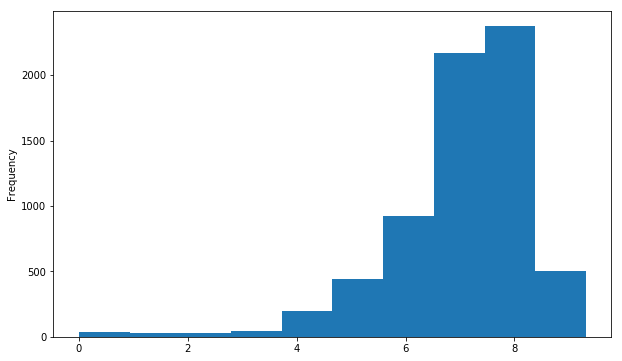

In [864]:
positive_revenue['revenue_log'] = log10(positive_revenue['revenue'])
positive_revenue['revenue_log'].plot.hist()

In [865]:
# Calculate interquartile range
q1 = positive_revenue['revenue_log'].quantile(q=0.25)
q3 = positive_revenue['revenue_log'].quantile(q=0.75)
iqr = q3 - q1
print('Interquartile range: ', iqr)

Interquartile range:  1.350554003224576


In [866]:
# Outlier: lower values than (q1-1.5*iqr)
positive_revenue[positive_revenue['revenue_log'] < (q1-1.5*iqr)]

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,runtime_log,revenue_log
87,False,0.0,Comedy,13997,tt0115697,en,Black Sheep,8.963037,Paramount Pictures,United States of America,1996-02-01,32.0,87.0,English,Released,Black Sheep,6.0,124.0,1.939519,1.505150
180,False,2.0,Thriller,48787,tt0110604,en,Mute Witness,2.466066,Comet Film Produktion GmbH,Germany,1995-09-28,1.0,95.0,PÑÑÑÐºÐ¸Ð¹,Released,Mute Witness,6.4,36.0,1.977724,0.000000
185,False,8.0,Fantasy,11980,tt0114194,en,The Prophecy,10.187623,Dimension Films,United States of America,1995-09-01,16.0,98.0,English,Released,The Prophecy,6.4,139.0,1.991226,1.204120
274,False,6.0,Comedy,17402,tt0113808,en,Miami Rhapsody,1.137266,Hollywood Pictures,United States of America,1995-01-27,5.0,95.0,English,Released,Miami Rhapsody,5.6,7.0,1.977724,0.698970
380,False,0.0,Comedy,52038,tt0110455,en,A Man of No Importance,0.406113,BBC Films,United Kingdom,1994-12-22,953.0,99.0,English,Released,A Man of No Importance,6.5,2.0,1.995635,2.979093
454,False,0.0,Drama,2087,tt0109890,en,The Getaway,14.214403,Universal Pictures,Japan,1994-02-11,30.0,115.0,English,Released,The Getaway,5.4,81.0,2.060698,1.477121
659,False,0.0,Drama,896,tt0052572,bn,à¦ à¦ªà§à¦° à¦¸à¦à¦¸à¦¾à¦°,2.381806,Satyajit Ray Productions,India,1959-05-01,16000.0,117.0,à¦¬à¦¾à¦à¦²à¦¾,Released,The World of Apu,8.2,40.0,2.068186,4.204120
710,False,0.0,Drama,46063,tt0116827,en,Last Dance,1.196686,Touchstone Pictures,United States of America,1996-05-02,5.0,103.0,English,Released,Last Dance,5.6,9.0,2.012837,0.698970
922,False,1.0,Drama,220,tt0048028,en,East of Eden,6.428830,Warner Bros.,United States of America,1955-03-09,5.0,115.0,English,Released,East of Eden,7.5,163.0,2.060698,0.698970
945,False,0.0,Romance,57575,tt0047162,en,The Last Time I Saw Paris,0.912955,Metro-Goldwyn-Mayer (MGM),United States of America,1954-01-01,105.0,116.0,English,Released,The Last Time I Saw Paris,5.1,9.0,2.064458,2.021189


In [867]:
print('Outliers (lower values than (q1-1.5*iqr)): ', len(positive_revenue[positive_revenue['revenue_log'] < (q1-1.5*iqr)]))

Outliers (lower values than (q1-1.5*iqr)):  277


In [868]:
# Outlier: greater values than (q3+1.5*iqr)
positive_revenue[positive_revenue['revenue_log'] > (q3+1.5*iqr)]

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,runtime_log,revenue_log


In [869]:
print('Outliers (greater values than (q3+1.5*iqr)): ', len(positive_revenue[positive_revenue['revenue_log'] > (q3+1.5*iqr)]))

Outliers (greater values than (q3+1.5*iqr)):  0


In [870]:
df_tm = positive_revenue[(positive_revenue['revenue_log'] > (q1-1.5*iqr)) & (positive_revenue['revenue_log'] < (q3+1.5*iqr))]
df3 = positive_revenue[(positive_revenue['revenue_log'] > (q1-1.5*iqr)) & (positive_revenue['revenue_log'] < (q3+1.5*iqr))]
print('df3 len: ', len(df3))

df3 len:  6479


## Bivariate

In [871]:
df3.corr(method='spearman')

,adult,budget,id,popularity,revenue,runtime,vote_average,vote_count,runtime_log,revenue_log
adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,NaN,1.000000,-0.181660,0.478494,0.684382,0.229681,-0.059550,0.611165,0.229681,0.684382
id,NaN,-0.181660,1.000000,-0.188791,-0.278618,-0.093348,-0.144134,-0.208157,-0.093348,-0.278618
popularity,NaN,0.478494,-0.188791,1.000000,0.556306,0.143423,0.212081,0.757101,0.143423,0.556306
revenue,NaN,0.684382,-0.278618,0.556306,1.000000,0.232101,0.078742,0.714212,0.232101,1.000000
runtime,NaN,0.229681,-0.093348,0.143423,0.232101,1.000000,0.319124,0.165856,1.000000,0.232101
vote_average,NaN,-0.059550,-0.144134,0.212081,0.078742,0.319124,1.000000,0.285221,0.319124,0.078742
vote_count,NaN,0.611165,-0.208157,0.757101,0.714212,0.165856,0.285221,1.000000,0.165856,0.714212
runtime_log,NaN,0.229681,-0.093348,0.143423,0.232101,1.000000,0.319124,0.165856,1.000000,0.232101
revenue_log,NaN,0.684382,-0.278618,0.556306,1.000000,0.232101,0.078742,0.714212,0.232101,1.000000


Just like I considered before **zero** revenue as **missing data**, I am going to do the same for budget (float).

In [872]:
total_budget = len(df3)
print('Total budget instances: ', total_budget)

zero_budget = len(df3[df3['budget'] == 0])
print('Instances with zero budget: ', zero_budget)

positive_budget = len(df3[df3['budget'] > 0])
print('Instances with positive budget: ', positive_budget)


negative_budget = len(df3[df3['budget'] < 0])
print('Instances with negative budget: ', negative_budget)

Total budget instances:  6479
Instances with zero budget:  1558
Instances with positive budget:  4921
Instances with negative budget:  0


In [873]:
df3 = df3.loc[df3['budget'] > 0]
zero_budget = len(df3[df3['budget'] == 0])
print('Instances with zero budget: ', zero_budget)

Instances with zero budget:  0


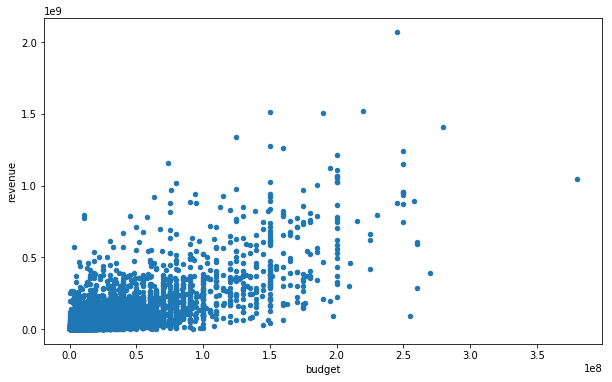

In [874]:
df3.plot.scatter(x='budget', y='revenue')

In [875]:
# Turn relationship into univariate
df3['profit'] = df3['revenue'] - df3['budget']
df3['profit'].describe()

count    4.921000e+03
mean     6.074132e+07
std      1.338759e+08
min     -1.657101e+08
25%     -1.300000e+06
50%      1.328770e+07
75%      6.740006e+07
max      1.823224e+09
Name: profit, dtype: float64

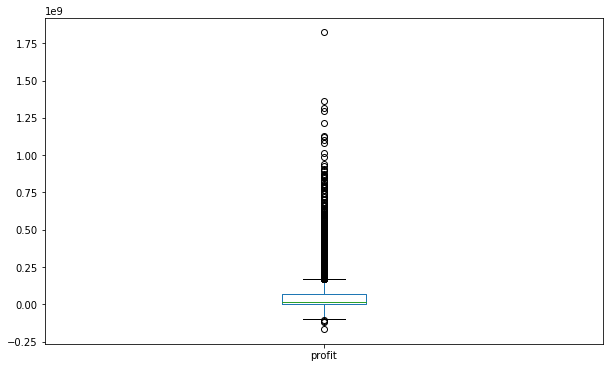

In [876]:
df3['profit'].plot.box()

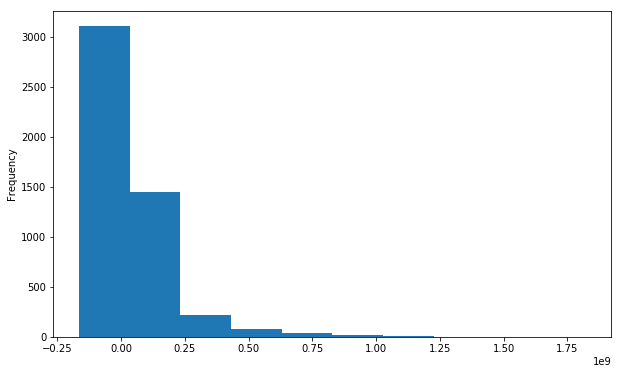

In [877]:
df3['profit'].plot.hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


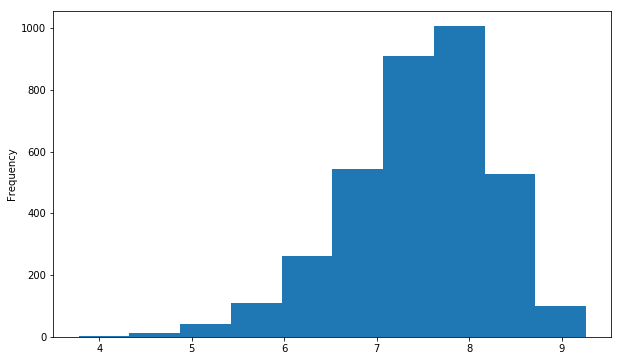

In [878]:
df3 = df3.loc[(df3['profit'] > 0) | (df3['profit'] < 0)] # avoid divide by zero
df3['profit_log'] = log10(df3['profit'])
df3['profit_log'].plot.hist()

In [879]:
# Median Absolute Deviation
mad = abs(df3['profit_log'] - df3['profit_log'].median()).median()*(1/0.6745)
print('mad: ', mad)

mad:  0.7415894659516629


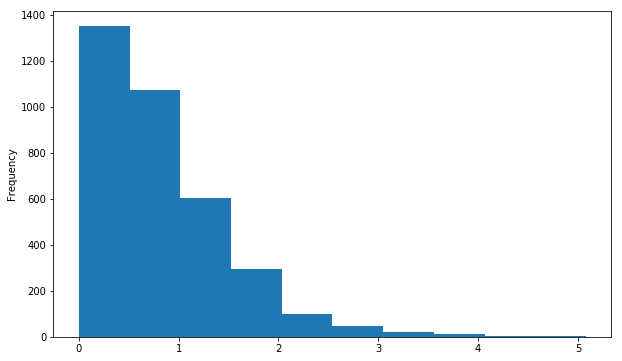

In [880]:
(abs(df3['profit_log'] - df3['profit_log'].median())/mad).plot.hist()

In [881]:
# Show outliers
df3[abs(df3['profit_log'] - df3['profit_log'].median())/mad > 3.5]

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title,vote_average,vote_count,runtime_log,revenue_log,profit,profit_log
88,False,8169363.0,Crime,2086,tt0113972,en,Nick of Time,6.848591,Paramount Pictures,United States of America,...,90.0,English,Released,Nick of Time,6.1,190.0,1.954243,6.912506,5983.0,3.776919
827,False,2962051.0,Drama,549,tt0115632,en,Basquiat,4.797674,Miramax,United States of America,...,108.0,English,Released,Basquiat,6.6,97.0,2.033424,6.478739,49144.0,4.691471
1402,False,50000000.0,Crime,66,tt0118548,en,Absolute Power,7.661240,Columbia Pictures,United States of America,...,121.0,English,Released,Absolute Power,6.4,226.0,2.082785,7.699563,68310.0,4.834484
1915,False,1227401.0,Mystery,1411,tt0102757,en,The Rapture,8.319631,Fine Line Features,United States of America,...,100.0,English,Released,The Rapture,6.4,15.0,2.000000,6.106327,50000.0,4.698970
2387,False,3000000.0,Comedy,18892,tt0155776,en,Jawbreaker,7.434797,TriStar Pictures,United States of America,...,87.0,English,Released,Jawbreaker,5.9,93.0,1.939519,6.488102,76820.0,4.885474
2466,False,6000.0,Crime,11660,tt0154506,en,Following,5.283661,Syncopy,United Kingdom,...,69.0,English,Released,Following,7.2,363.0,1.838849,4.685581,42482.0,4.628205
2504,False,786675.0,Drama,13852,tt0118826,en,The Castle,4.337545,Working Dog,Australia,...,85.0,English,Released,The Castle,7.4,69.0,1.929419,5.935401,75114.0,4.875721
4516,False,20000.0,Crime,36095,tt0123948,ja,ã­ã¥ã¢,3.111281,Daiei Studios,Japan,...,111.0,æ¥æ¬èª,Released,Cure,7.4,63.0,2.045323,4.995635,79000.0,4.897627
5885,False,120000.0,Crime,8073,tt0057869,fr,Bande Ã part,5.648187,Orsay Films,France,...,97.0,English,Released,Band of Outsiders,7.5,103.0,1.986772,5.262112,62857.0,4.798354
7149,False,1135654.0,Action,28963,tt0015400,en,The Thief of Bagdad,3.878515,Douglas Fairbanks Pictures,United States of America,...,149.0,No Language,Released,The Thief of Bagdad,7.4,37.0,2.173186,6.084176,78226.0,4.893351


In [882]:
print('Total (df3 len): ', len(df3))
print('Outlier (mad < 3.5): ', len(df3[abs(df3['profit_log'] - df3['profit_log'].median())/mad > 3.5]))

Total (df3 len):  4912
Outlier (mad < 3.5):  22


In [883]:
df3 = df3[abs(df3['profit_log'] - df3['profit_log'].median())/mad < 3.5]
print('df3 len: ', len(df3))

df3 len:  3492


## Multivariate --> df4

Here I am bringing back **df2** in order to not merge the results from **df3** (univariate and bivariate).

In [884]:
df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,runtime_log
count,3.199400e+04,31994.000000,31994.000000,3.199400e+04,31994.000000,31994.000000,31994.000000,31994.000000
mean,5.917794e+06,98203.537007,3.780665,1.585737e+07,99.243108,5.842167,152.546665,1.972609
std,2.050224e+07,111149.237387,6.916594,7.618912e+07,29.576562,1.594721,580.177457,0.182484
min,0.000000e+00,2.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,19690.500000,0.658284,0.000000e+00,88.000000,5.300000,5.000000,1.944483
50%,0.000000e+00,47852.500000,1.764260,0.000000e+00,96.000000,6.100000,16.000000,1.982271
75%,1.200000e+01,132289.250000,5.512900,0.000000e+00,109.000000,6.800000,59.750000,2.037426
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,931.000000,10.000000,14075.000000,2.968950


In [885]:
df4 = df2.loc[(df2['budget'] > 0) | (df2['revenue'] > 0)]
print('Instances with positive budget and positive revenue: ', len(df4))

Instances with positive budget and positive revenue:  9813


In [886]:
df4.dtypes

adult                             bool
budget                         float64
genres                        category
id                               int64
imdb_id                       category
original_language             category
original_title                category
popularity                     float64
production_companies          category
production_countries          category
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages              category
status                        category
title                         category
vote_average                   float64
vote_count                     float64
runtime_log                    float64
dtype: object

In [887]:
# Set cat codes
df4['genres'] = df4['genres'].cat.codes
df4['imdb_id'] = df4['imdb_id'].cat.codes
df4['original_language'] = df4['original_language'].cat.codes
df4['original_title'] = df4['original_title'].cat.codes
df4['production_companies'] = df4['production_companies'].cat.codes
df4['production_countries'] = df4['production_countries'].cat.codes
df4['spoken_languages'] = df4['spoken_languages'].cat.codes
df4['status'] = df4['status'].cat.codes
df4['title'] = df4['title'].cat.codes

df4['release_date'] = df['release_date'].astype('category')
df4['release_date'] = df4['release_date'].cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [888]:
df4.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,runtime_log
0,False,30000000.0,2,862,17052,20,36902,21.946943,6993,131,10677,373554033.0,81.0,13,4,39018,7.7,5415.0,1.908485
1,False,65000000.0,1,8844,16812,20,16241,17.015539,9171,131,10708,262797249.0,104.0,13,4,16806,6.9,2413.0,2.017033
3,False,16000000.0,3,31357,17082,20,38527,3.859495,9245,131,10713,81452156.0,127.0,13,4,40428,6.1,34.0,2.103804
4,False,0.0,3,11862,16703,20,10835,8.387519,7859,131,10509,76578911.0,106.0,13,4,11199,5.7,173.0,2.025306
5,False,60000000.0,0,949,16769,20,13372,17.924927,7498,131,10708,187436818.0,170.0,13,4,13962,7.7,1886.0,2.230449


### Elliptic Envelope --> df_ee

In [0]:
df_ee = df4.copy()

In [890]:
from sklearn.covariance import EllipticEnvelope

detector = EllipticEnvelope(contamination=0.01)
detector.fit(df_ee)

/usr/local/lib/python3.6/dist-packages/sklearn/covariance/robust_covariance.py:646: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
         store_precision=True, support_fraction=None)

In [891]:
scores = detector.predict(df_ee)
print(scores)

[1 1 1 ... 1 1 1]


In [892]:
df_ee['outlier'] = scores
print(df_ee.head())

   adult      budget  genres     id  imdb_id  original_language  \
0  False  30000000.0       2    862    17052                 20   
1  False  65000000.0       1   8844    16812                 20   
3  False  16000000.0       3  31357    17082                 20   
4  False         0.0       3  11862    16703                 20   
5  False  60000000.0       0    949    16769                 20   

   original_title  popularity  production_companies  production_countries  \
0           36902   21.946943                  6993                   131   
1           16241   17.015539                  9171                   131   
3           38527    3.859495                  9245                   131   
4           10835    8.387519                  7859                   131   
5           13372   17.924927                  7498                   131   

   release_date      revenue  runtime  spoken_languages  status  title  \
0         10677  373554033.0     81.0                13     

In [893]:
# Outliers
df_ee[df_ee['outlier'] == -1]

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,runtime_log,outlier
1229,False,8000000.0,15,149,13516,39,41498,10.888917,996,62,9195,5.531710e+05,124.0,67,4,1936,7.8,792.0,2.093422,-1
1639,False,200000000.0,6,597,18242,20,36579,26.889070,6807,131,11166,1.845034e+09,194.0,13,4,38665,7.5,7770.0,2.287802,-1
2510,False,11791.0,8,17962,19750,39,41767,2.916805,2889,62,11366,0.000000e+00,118.0,67,4,1799,7.3,49.0,2.071882,-1
2764,False,15000000.0,1,10974,12909,14,42924,7.278549,4627,51,8841,0.000000e+00,88.0,66,4,3061,6.8,111.0,1.944483,-1
3620,False,0.0,6,643,361,68,40374,12.912845,3883,102,462,4.510000e+04,75.0,33,4,3996,7.6,201.0,1.875061,-1
5847,False,0.0,6,4435,21797,31,41076,1.484908,2664,54,12172,1.900000e+07,155.0,59,4,3167,5.8,28.0,2.190332,-1
6524,False,0.0,6,41806,14703,22,40052,0.940509,2837,60,9514,2.000000e+06,102.0,21,4,3431,6.5,11.0,2.008600,-1
6768,False,0.0,6,897,4509,10,41177,2.800510,2917,54,3721,1.702150e+05,110.0,60,4,2922,7.9,44.0,2.041393,-1
6870,False,4500000.0,6,3176,22242,39,41676,12.701098,6403,62,11976,2.500000e+07,114.0,67,4,3967,7.3,992.0,2.056905,-1
7552,False,110.0,6,4552,24638,44,43256,6.247028,883,112,12685,0.000000e+00,115.0,69,4,1352,7.0,234.0,2.060698,-1


In [894]:
print('Outliers: ', len(df_ee[df_ee['outlier'] == -1]))

Outliers:  99


In [895]:
df_ee = df_ee[df_ee['outlier'] != -1]
print('df_ee len: ', len(df_ee))

df_ee len:  9714


### Isolation Forests --> df_if

In [0]:
df_if = df4.copy()

In [897]:
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(df4)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples=100, n_estimators=100, n_jobs=None,
        random_state=<mtrand.RandomState object at 0x7f13a936c900>,
        verbose=0)

In [898]:
scores = clf.predict(df_if)
print(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[-1  1  1 ...  1 -1  1]


In [899]:
df_if['outlier'] = scores
print(df_if.head())

   adult      budget  genres     id  imdb_id  original_language  \
0  False  30000000.0       2    862    17052                 20   
1  False  65000000.0       1   8844    16812                 20   
3  False  16000000.0       3  31357    17082                 20   
4  False         0.0       3  11862    16703                 20   
5  False  60000000.0       0    949    16769                 20   

   original_title  popularity  production_companies  production_countries  \
0           36902   21.946943                  6993                   131   
1           16241   17.015539                  9171                   131   
3           38527    3.859495                  9245                   131   
4           10835    8.387519                  7859                   131   
5           13372   17.924927                  7498                   131   

   release_date      revenue  runtime  spoken_languages  status  title  \
0         10677  373554033.0     81.0                13     

In [900]:
# Outliers
df_if[df_if['outlier'] == -1]

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,runtime_log,outlier
0,False,30000000.0,2,862,17052,20,36902,21.946943,6993,131,10677,373554033.0,81.0,13,4,39018,7.7,5415.0,1.908485,-1
108,False,72000000.0,0,197,16601,20,4966,20.755149,4353,131,10575,210000000.0,177.0,13,4,5477,7.7,3404.0,2.247973,-1
150,False,100000000.0,0,414,16576,20,3579,13.321354,9645,129,10588,336529144.0,121.0,13,4,3932,5.2,1529.0,2.082785,-1
162,False,90000000.0,0,1572,16668,20,8644,15.138855,9245,131,10572,366101666.0,128.0,13,4,9128,6.9,2094.0,2.107210,-1
205,False,175000000.0,1,9804,17086,20,38683,16.885184,9375,131,10610,264218220.0,135.0,13,4,40618,5.9,1017.0,2.130334,-1
228,False,0.0,3,10451,16526,90,42878,4.860016,527,119,10384,7294403.0,123.0,68,4,10090,7.5,76.0,2.089905,-1
256,False,11000000.0,1,11,10147,20,29183,42.149697,5421,131,7205,775398007.0,121.0,13,4,28841,8.1,6778.0,2.082785,-1
289,False,16000000.0,17,101,16293,27,20084,20.477329,2085,45,10411,45284974.0,110.0,13,4,18333,8.2,4293.0,2.041393,-1
292,False,8000000.0,17,680,16383,20,25427,140.950236,5984,131,10408,213928762.0,154.0,13,4,24926,8.3,8670.0,2.187521,-1
314,False,25000000.0,6,278,16430,20,35104,51.645403,1655,131,10418,28341469.0,142.0,13,4,36594,8.5,8358.0,2.152288,-1


In [901]:
print('Outliers: ', len(df_if[df_if['outlier'] == -1]))

Outliers:  982


In [902]:
df_if = df_if[df_if['outlier'] != -1]
print('df_if len: ', len(df_if))

df_if len:  8831


### Local Outlier Factor

In [0]:
df_lof = df4.copy()

In [0]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10, contamination=0.1)

In [0]:
scores = clf.fit_predict(df_lof)

In [906]:
-1*clf.negative_outlier_factor_

array([0.98214251, 1.00500135, 1.13679132, ..., 1.08904761, 0.96389225,
       1.01344438])

In [907]:
print(scores)

[1 1 1 ... 1 1 1]


In [908]:
df_lof['outlier'] = scores
print(df_lof.head())

   adult      budget  genres     id  imdb_id  original_language  \
0  False  30000000.0       2    862    17052                 20   
1  False  65000000.0       1   8844    16812                 20   
3  False  16000000.0       3  31357    17082                 20   
4  False         0.0       3  11862    16703                 20   
5  False  60000000.0       0    949    16769                 20   

   original_title  popularity  production_companies  production_countries  \
0           36902   21.946943                  6993                   131   
1           16241   17.015539                  9171                   131   
3           38527    3.859495                  9245                   131   
4           10835    8.387519                  7859                   131   
5           13372   17.924927                  7498                   131   

   release_date      revenue  runtime  spoken_languages  status  title  \
0         10677  373554033.0     81.0                13     

In [909]:
# Outliers
df_lof[df_lof['outlier'] == -1]

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,runtime_log,outlier
6,False,58000000.0,3,11860,16977,20,26877,6.677277,6807,47,10708,0.0,127.0,16,4,26420,6.2,141.0,2.103804,-1
80,False,8000000.0,6,400,17038,20,36256,4.486179,5984,131,10702,529766.0,116.0,13,4,38266,6.7,87.0,2.064458,-1
99,False,7000000.0,3,13685,17174,20,4868,6.904831,3891,131,10749,560069.0,91.0,14,4,5366,6.8,285.0,1.959041,-1
109,False,1300000.0,4,103,9851,20,30301,14.092713,2086,131,6966,28262574.0,114.0,13,4,30006,8.1,2632.0,2.056905,-1
113,False,13365000.0,3,43612,16596,20,18450,1.254885,3538,45,10502,0.0,106.0,16,4,13673,7.0,23.0,2.025306,-1
154,False,11000000.0,0,1775,16071,20,5602,5.391556,7049,24,10584,178104.0,91.0,13,4,6138,5.9,57.0,1.959041,-1
184,False,150000.0,3,36196,16930,20,24241,1.165039,6840,131,10585,472370.0,94.0,13,4,23727,5.8,14.0,1.973128,-1
205,False,175000000.0,1,9804,17086,20,38683,16.885184,9375,131,10610,264218220.0,135.0,13,4,40618,5.9,1017.0,2.130334,-1
242,False,700000.0,5,14275,16215,20,13983,9.476660,3367,131,10409,7830611.0,171.0,13,4,14611,7.7,91.0,2.232996,-1
256,False,11000000.0,1,11,10147,20,29183,42.149697,5421,131,7205,775398007.0,121.0,13,4,28841,8.1,6778.0,2.082785,-1


In [910]:
print('Outliers: ', len(df_lof[df_lof['outlier'] == -1]))

Outliers:  982


In [911]:
df_lof = df_lof[df_lof['outlier'] != -1]
print('df_lof len: ', len(df_lof))

df_lof len:  8831


### Results

After applying ** three multivariate outlier detection methods**, the results are (*Method name: length of outliers found*):


*   Elliptic Envelope: 99
*   Isolation Forests: 982
*   Local Outlier Factor: 982


# Hypothesis tests

In [912]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [914]:
df3.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title,vote_average,vote_count,runtime_log,revenue_log,profit,profit_log
0,False,30000000.0,Animation,862,tt0114709,en,Toy Story,21.946943,Pixar Animation Studios,United States of America,...,81.0,English,Released,Toy Story,7.7,5415.0,1.908485,8.572353,343554033.0,8.535995
1,False,65000000.0,Adventure,8844,tt0113497,en,Jumanji,17.015539,TriStar Pictures,United States of America,...,104.0,English,Released,Jumanji,6.9,2413.0,2.017033,8.419621,197797249.0,8.296220
3,False,16000000.0,Comedy,31357,tt0114885,en,Waiting to Exhale,3.859495,Twentieth Century Fox Film Corporation,United States of America,...,127.0,English,Released,Waiting to Exhale,6.1,34.0,2.103804,7.910903,65452156.0,7.815924
8,False,35000000.0,Action,9091,tt0114576,en,Sudden Death,5.231580,Universal Pictures,United States of America,...,106.0,English,Released,Sudden Death,5.5,174.0,2.025306,7.808550,29350171.0,7.467611
9,False,58000000.0,Adventure,710,tt0113189,en,GoldenEye,14.686036,United Artists,United Kingdom,...,130.0,English,Released,GoldenEye,6.6,1194.0,2.113943,8.546782,294194034.0,8.468634


In [915]:
print('Columns: ', list(df3.columns))

Columns:  ['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'vote_average', 'vote_count', 'runtime_log', 'revenue_log', 'profit', 'profit_log']


In [916]:
print('Genres: ', list(df3.genres.unique()))

Genres:  ['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Science Fiction', 'Fantasy', 'Horror', 'Thriller', 'Family', 'Romance', 'Mystery', 'Music', 'War', 'Western', 'History', 'Documentary', 'TV Movie']


In [917]:
print('production_countries: ', list(df3.production_countries.unique()))

production_countries:  ['United States of America', 'United Kingdom', 'Australia', 'Hong Kong', 'Japan', 'Germany', 'Austria', 'France', 'Mexico', 'Peru', 'Canada', 'New Zealand', 'Ireland', 'Brazil', 'Italy', 'Iran', 'South Africa', 'Bahamas', 'Spain', 'Serbia', 'Argentina', 'China', 'Czech Republic', 'Thailand', 'Netherlands', 'India', 'Greece', 'Taiwan', 'Romania', 'Sweden', 'South Korea', 'Russia', 'Switzerland', 'Finland', 'Uruguay', 'Algeria', 'Iceland', 'Belgium', 'Poland', 'Singapore', 'Israel', 'Denmark', 'Norway', 'United Arab Emirates', 'Indonesia', 'Hungary', 'Turkey', 'Philippines', 'Burkina Faso', 'Malta', 'Chile', 'Bulgaria', 'Pakistan', 'Cambodia', 'Malaysia', 'Ukraine']


## Test 01
### Check if there is a difference in terms of *revenue* and *popularity* between *Drama* and *Documentary* genres movies.

Compare two unpaired groups --> Mann-Whitnet U Test

In [918]:
# Using datafram from tukey method result (df_tm)
df_tm.groupby('genres')['genres'].count()

genres
Action             1087
Adventure           438
Animation           176
Comedy             1403
Crime               304
Documentary          94
Drama              1633
Family               75
Fantasy             161
Foreign               2
History              29
Horror              371
Music                46
Mystery              85
Romance             150
Science Fiction     109
TV Movie              1
Thriller            233
War                  43
Western              39
Name: genres, dtype: int64

### Revenue

In [919]:
stats.mannwhitneyu(df_tm[df_tm['genres'] == 'Drama']['revenue'], df_tm[df_tm['genres'] == 'Documentary']['revenue'])

MannwhitneyuResult(statistic=42562.0, pvalue=1.7736675370473979e-13)

In [0]:
data1 = df_tm[df_tm['genres'] == 'Drama']['revenue']
data2 = df_tm[df_tm['genres'] == 'Documentary']['revenue']

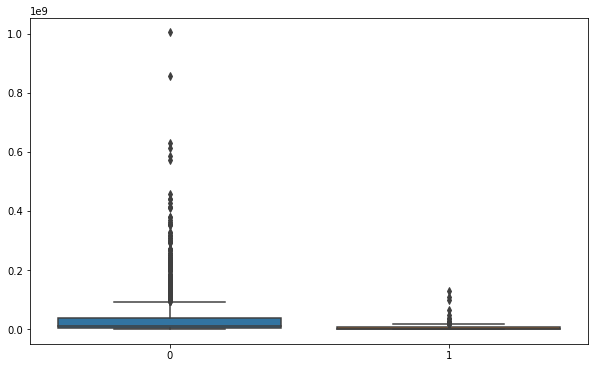

In [921]:
sns.boxplot(data=[data1, data2])

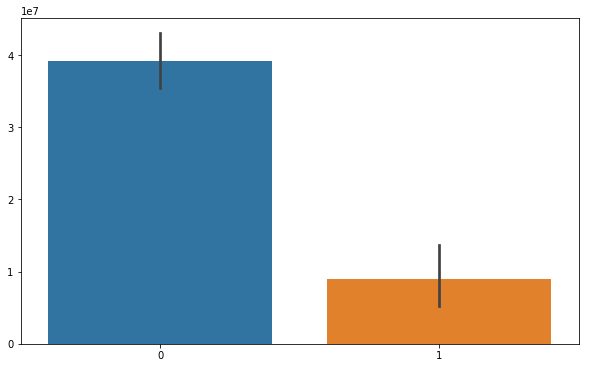

In [922]:
sns.barplot(data=[data1, data2])

### Popularity

In [923]:
stats.mannwhitneyu(df_tm[df_tm['genres'] == 'Drama']['popularity'], df_tm[df_tm['genres'] == 'Documentary']['popularity'])

MannwhitneyuResult(statistic=46097.0, pvalue=3.5174079653826674e-11)

In [0]:
data1 = df_tm[df_tm['genres'] == 'Drama']['popularity']
data2 = df_tm[df_tm['genres'] == 'Documentary']['popularity']

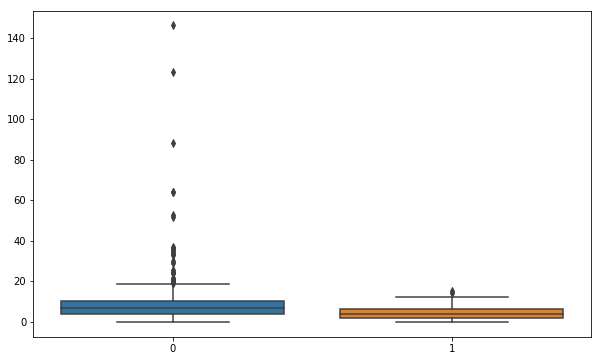

In [925]:
sns.boxplot(data=[data1, data2])

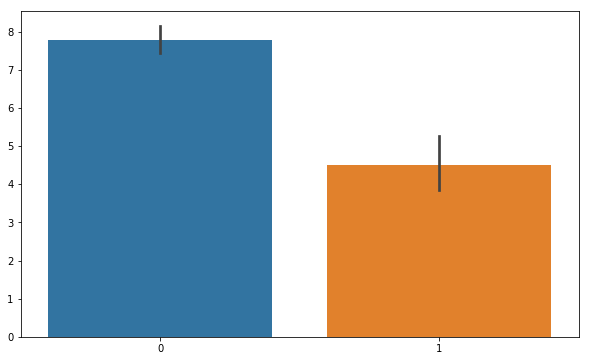

In [926]:
sns.barplot(data=[data1, data2])

## Test 02
### Profit (revenue - budget)

In [927]:
df3[['budget','revenue', 'profit']].describe()

,budget,revenue,profit
count,3.492000e+03,3.492000e+03,3.492000e+03
mean,3.534738e+07,1.258694e+08,9.052207e+07
std,4.399031e+07,1.797311e+08,1.487146e+08
min,1.000000e+00,1.500000e+05,1.000000e+05
25%,6.000000e+06,2.248543e+07,1.030459e+07
50%,2.000000e+07,6.224606e+07,3.555293e+07
75%,4.525000e+07,1.535639e+08,1.039620e+08
max,3.800000e+08,2.068224e+09,1.823224e+09


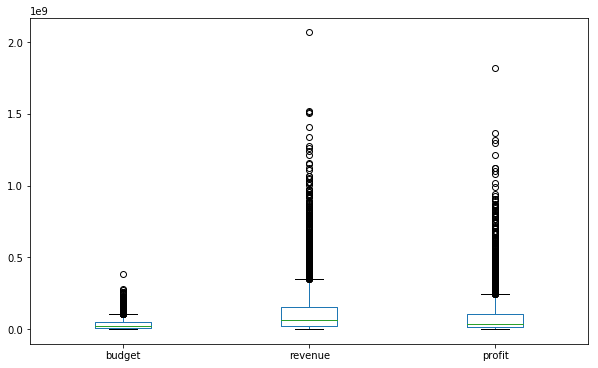

In [928]:
df3[['budget','revenue', 'profit']].plot.box()

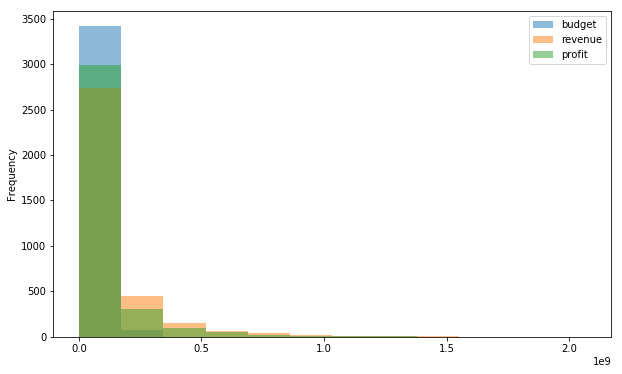

In [929]:
df3[['budget','revenue', 'profit']].plot.hist(bins=12, alpha=0.5)

In [930]:
# Normality test: Shapiro-Wilk
stats.shapiro(df3['profit'])

(0.5959625244140625, 0.0)

In [931]:
# T-test
stats.ttest_rel(df3['budget'], df3['revenue'])

Ttest_relResult(statistic=-35.96980236960055, pvalue=2.670444978069905e-241)

In [932]:
# Wilcoxon test
stats.wilcoxon(df3['budget'], df3['revenue'])

WilcoxonResult(statistic=0.0, pvalue=0.0)

## General visualization of descriptive data statistics

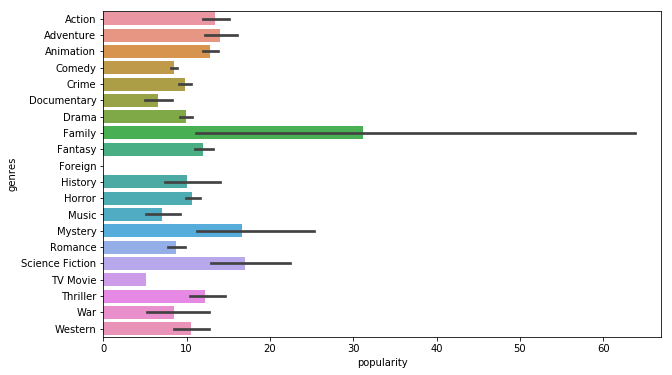

In [933]:
# popularity X genres
sns.barplot(x='popularity', y='genres', data=df3)

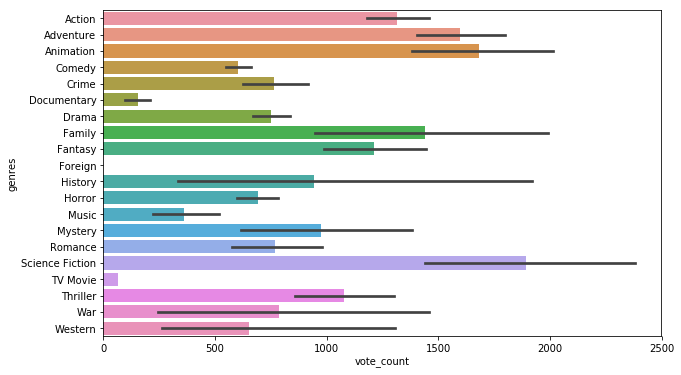

In [934]:
# vote_count X genres
sns.barplot(x='vote_count', y='genres', data=df3)

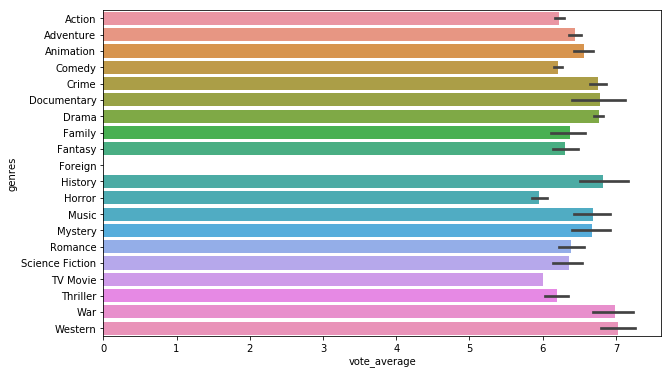

In [935]:
# vote_average X genres
sns.barplot(x='vote_average', y='genres', data=df3)

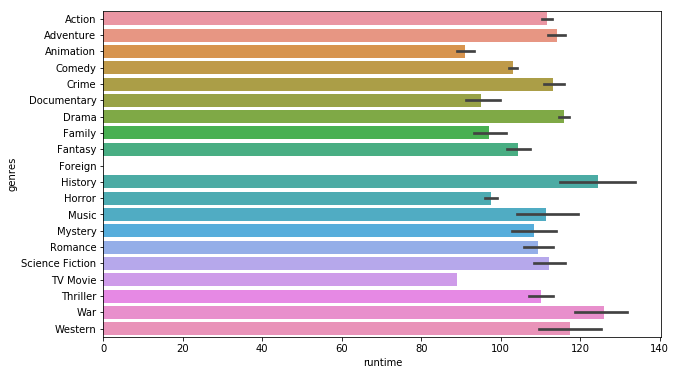

In [936]:
# runtime X genres
sns.barplot(x='runtime', y='genres', data=df3)